Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
diabetes_train |> glimpse()



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 10, 10, 1, 13, 5, 3, 6, 10, 4, 11, 3, 7…
$ Glucose                  <dbl> 85, 89, 115, 139, 103, 145, 117, 88, 92, 122,…
$ BloodPressure            <dbl> 66, 66, 0, 80, 30, 82, 92, 58, 92, 78, 60, 76…
$ SkinThickness            <dbl> 29, 23, 0, 0, 38, 19, 0, 11, 0, 31, 33, 0, 25…
$ Insulin                  <dbl> 0, 94, 0, 0, 83, 110, 0, 54, 0, 0, 192, 0, 70…
$ BMI                      <dbl> 26.6, 28.1, 35.3, 27.1, 43.3, 22.2, 34.1, 24.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.134, 1.441, 0.183, 0.245, 0.3…
$ Age                      <dbl> 31, 21, 29, 57, 33, 57, 38, 22, 28, 45, 33, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

In this dataset the outcome variable is a binary variable that represents whether the patient had diabetes or not.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

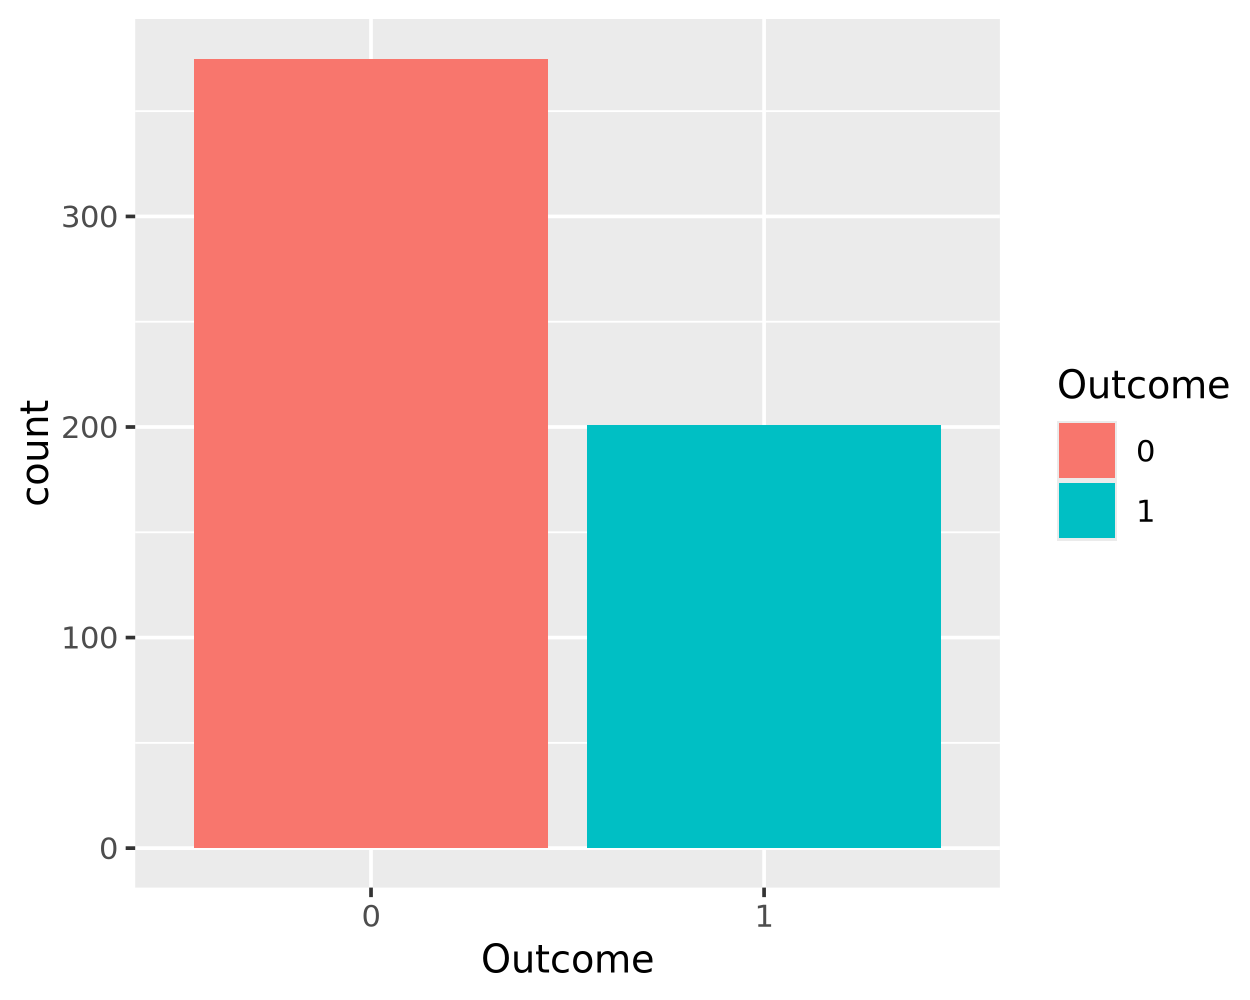

In [6]:
ggplot(data = diabetes_train, aes(x=Outcome, fill = Outcome)) +
    geom_bar()


❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

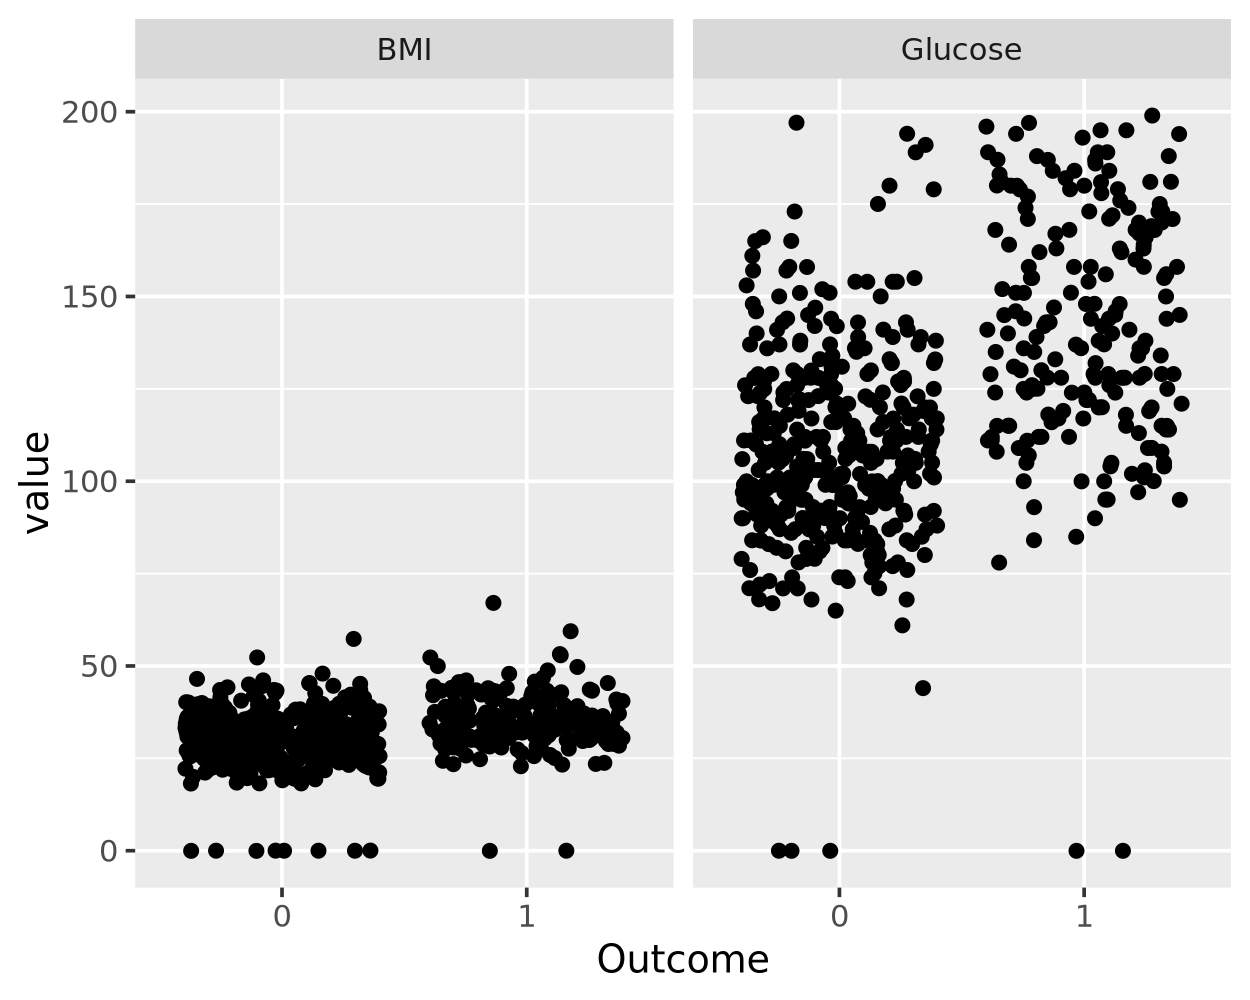

In [13]:
ggplot(plot_df, aes(x= Outcome, y= value)) +
geom_jitter() +
facet_wrap(~name, ncol = 2, scales = 'free_x')



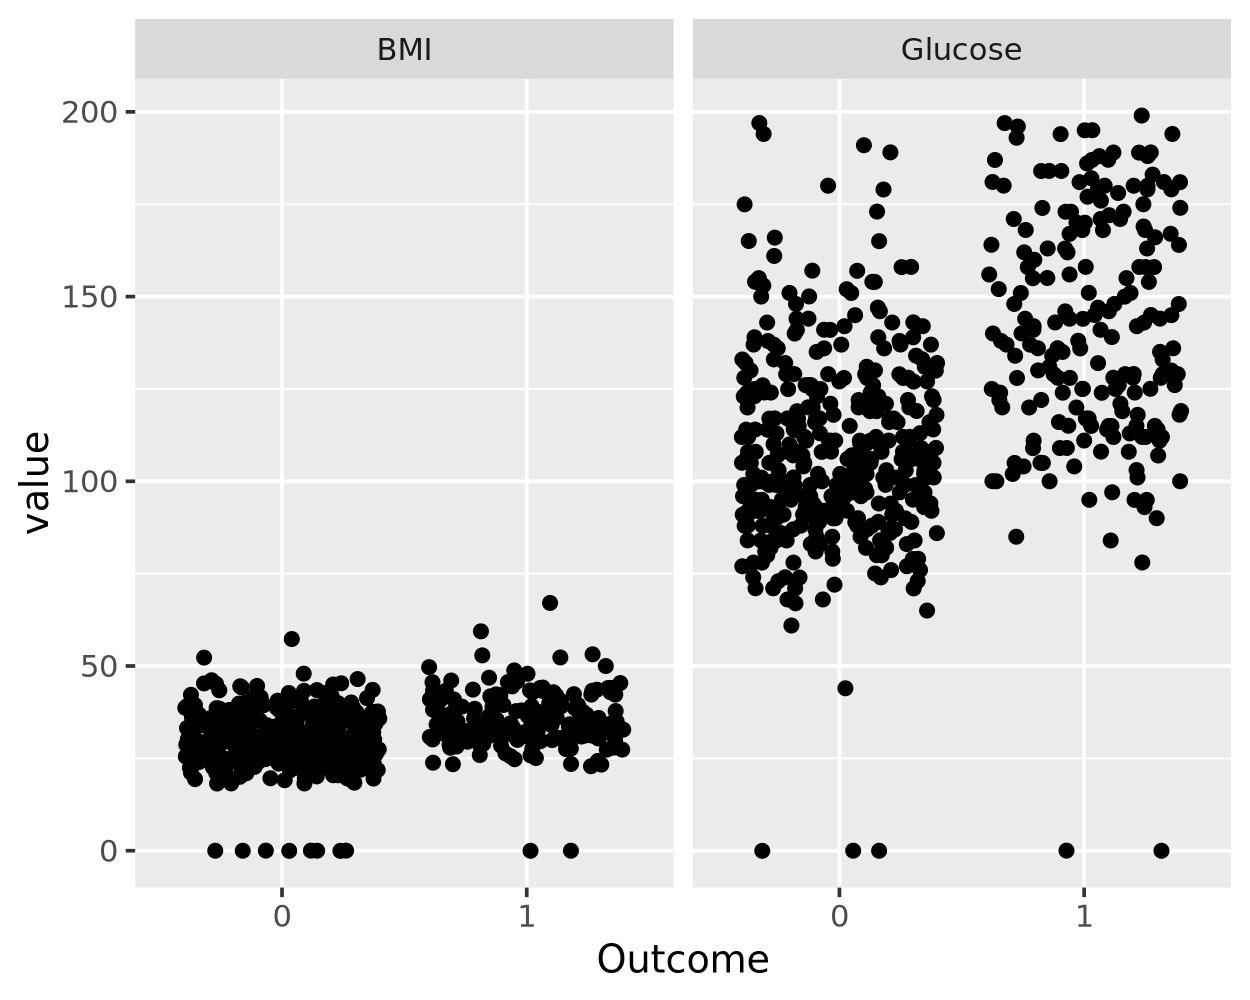

In [14]:
ggplot(plot_df, aes(x= Outcome, y= value)) +
geom_jitter() +
facet_wrap(~name, ncol = 2)

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

It's hard for me to tell, it almost looks like the one with the "scales" argument is more polished? there are fewer values that look like outliers. I'm not realy sure

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [16]:
mod = logistic_reg() |> set_engine('glm')

mod_fit = mod |> fit(Outcome ~ BMI +Glucose, diabetes_train)



Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [17]:
diabetes_test_WPred = augment(mod_fit, diabetes_test)

glimpse(diabetes_test_WPred)



Rows: 192
Columns: 12
$ .pred_class              <fct> 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, …
$ .pred_0                  <dbl> 0.8134504, 0.1370940, 0.6809662, 0.8157528, 0…
$ .pred_1                  <dbl> 0.18654961, 0.86290599, 0.31903377, 0.1842471…
$ Pregnancies              <dbl> 5, 2, 4, 7, 3, 8, 9, 10, 7, 1, 5, 9, 2, 7, 1,…
$ Glucose                  <dbl> 116, 197, 110, 107, 126, 99, 119, 125, 147, 9…
$ BloodPressure            <dbl> 74, 70, 92, 74, 88, 84, 80, 70, 76, 66, 75, 7…
$ SkinThickness            <dbl> 0, 45, 0, 0, 41, 0, 35, 26, 0, 15, 26, 37, 42…
$ Insulin                  <dbl> 0, 543, 0, 0, 235, 0, 0, 115, 0, 140, 0, 0, 0…
$ BMI                      <dbl> 25.6, 30.5, 37.6, 29.6, 39.3, 35.4, 29.0, 31.…
$ DiabetesPedigreeFunction <dbl> 0.201, 0.158, 0.191, 0.254, 0.704, 0.388, 0.2…
$ Age                      <dbl> 30, 53, 30, 31, 27, 50, 29, 41, 43, 22, 60, 4…
$ Outcome                  <fct> 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, …


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [18]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 106  33
         1  19  34

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

Based on the confusion matrix above, there were 53 individuals with diabetes (Truth = 1).
Of the 53 individuals who have diabetes, only 34 people were predicted to have diabetes (Truth = 1 AND Prediction = 1).
33 people predicted to have diabetes did not have diabetes (Prediction = 1 AND Truth = 0